# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as matplot
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_longs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
longs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for coord in lat_longs:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    country = citipy.nearest_city(coord[0], coord[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        

# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))

774
774


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# API URL
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Zero counters
i=0
x=0

# Make API calls and write to CSV
with open('data_holder.csv', 'w') as data:
    data.write('city_name,country_name,latitude,longitude,temperature,humidity,cloudiness,wind_speed,retrieved'+'\n')
    for city in cities:
        try:
            city_data = requests.get(url+cities[i]+","+countries[i]+"&units=imperial"+"&appid="+api_key).json()
            city_name = cities[i]
            country_name = countries[i]
            latitude = city_data['coord']['lat']
            longitude = city_data['coord']['lon']
            temperature = city_data['main']['temp']
            humidity = city_data['main']['humidity']
            cloudiness = city_data['clouds']['all']
            wind_speed = city_data['wind']['speed']
            date = city_data['dt']
            data.write(f'{city_name},{country_name},{latitude},{longitude},{temperature},{humidity},{cloudiness},{wind_speed},{time.strftime("%m/%d/%Y", time.gmtime(date))}'+'\n')
            print(f'Retrieved {i+1} of {len(cities)} | {cities[i]}, {countries[i]}')
            i = i + 1
            x = x + 1
        except:
            print(f'Oops, nothing to see here for {cities[i]}, {countries[i]}, moving on.')
            i = i + 1
print(f'Data retrieval complete: {x} of {len(cities)} sucessfully retrieved.')
data.close()

Retrieved 1 of 774 | portland, au
Retrieved 2 of 774 | cumberland, us
Oops, nothing to see here for mataura, pf, moving on.
Oops, nothing to see here for lata, sb, moving on.
Retrieved 5 of 774 | georgetown, sh
Oops, nothing to see here for palabuhanratu, id, moving on.
Retrieved 7 of 774 | rikitea, pf
Retrieved 8 of 774 | xingyi, cn
Retrieved 9 of 774 | kangaatsiaq, gl
Retrieved 10 of 774 | hermanus, za
Retrieved 11 of 774 | richards bay, za
Retrieved 12 of 774 | chabahar, ir
Retrieved 13 of 774 | atar, mr
Retrieved 14 of 774 | albany, au
Retrieved 15 of 774 | qaanaaq, gl
Retrieved 16 of 774 | pevek, ru
Retrieved 17 of 774 | severo-kurilsk, ru
Retrieved 18 of 774 | punta arenas, cl
Retrieved 19 of 774 | victoria, sc
Retrieved 20 of 774 | fort nelson, ca
Oops, nothing to see here for belushya guba, ru, moving on.
Retrieved 22 of 774 | kita, ml
Retrieved 23 of 774 | sao joao do piaui, br
Retrieved 24 of 774 | bambous virieux, mu
Retrieved 25 of 774 | cape town, za
Retrieved 26 of 774 | 

Retrieved 214 of 774 | tallahassee, us
Retrieved 215 of 774 | kolpashevo, ru
Retrieved 216 of 774 | madingou, cg
Retrieved 217 of 774 | avarua, ck
Retrieved 218 of 774 | high level, ca
Retrieved 219 of 774 | dospat, bg
Oops, nothing to see here for paradwip, in, moving on.
Retrieved 221 of 774 | pontianak, id
Retrieved 222 of 774 | swan hill, au
Retrieved 223 of 774 | zyryanskoye, ru
Retrieved 224 of 774 | provideniya, ru
Retrieved 225 of 774 | nantucket, us
Retrieved 226 of 774 | tuktoyaktuk, ca
Retrieved 227 of 774 | esterhazy, ca
Retrieved 228 of 774 | ixtapa, mx
Retrieved 229 of 774 | vardo, no
Retrieved 230 of 774 | kondinskoye, ru
Retrieved 231 of 774 | saint george, bm
Oops, nothing to see here for nizhneyansk, ru, moving on.
Oops, nothing to see here for ozgon, kg, moving on.
Retrieved 234 of 774 | sao gabriel da cachoeira, br
Retrieved 235 of 774 | sola, vu
Oops, nothing to see here for codrington, ag, moving on.
Oops, nothing to see here for tabiauea, ki, moving on.
Retrieved

Retrieved 426 of 774 | clyde river, ca
Retrieved 427 of 774 | alta floresta, br
Retrieved 428 of 774 | maraa, br
Oops, nothing to see here for acarau, br, moving on.
Retrieved 430 of 774 | broome, au
Retrieved 431 of 774 | champerico, gt
Retrieved 432 of 774 | galle, lk
Retrieved 433 of 774 | akdepe, tm
Retrieved 434 of 774 | ulaanbaatar, mn
Retrieved 435 of 774 | aliwal north, za
Retrieved 436 of 774 | isangel, vu
Retrieved 437 of 774 | constitucion, mx
Retrieved 438 of 774 | shenzhen, cn
Retrieved 439 of 774 | juruti, br
Retrieved 440 of 774 | kermanshah, ir
Retrieved 441 of 774 | luau, ao
Retrieved 442 of 774 | birjand, ir
Retrieved 443 of 774 | ban nahin, la
Retrieved 444 of 774 | mocuba, mz
Retrieved 445 of 774 | qaqortoq, gl
Retrieved 446 of 774 | iranduba, br
Retrieved 447 of 774 | halifax, ca
Retrieved 448 of 774 | truth or consequences, us
Retrieved 449 of 774 | nusaybin, tr
Retrieved 450 of 774 | aripuana, br
Retrieved 451 of 774 | aksha, ru
Retrieved 452 of 774 | toora-khem,

Retrieved 643 of 774 | matagami, ca
Retrieved 644 of 774 | hay river, ca
Retrieved 645 of 774 | san matias, bo
Retrieved 646 of 774 | kaputa, zm
Retrieved 647 of 774 | manadhoo, mv
Retrieved 648 of 774 | luanda, ao
Retrieved 649 of 774 | lockhart, us
Retrieved 650 of 774 | zapolyarnyy, ru
Retrieved 651 of 774 | mezen, ru
Retrieved 652 of 774 | bud, no
Retrieved 653 of 774 | kachug, ru
Retrieved 654 of 774 | castrillon, es
Retrieved 655 of 774 | khandbari, np
Retrieved 656 of 774 | baoqing, cn
Retrieved 657 of 774 | tlaxco, mx
Retrieved 658 of 774 | placido de castro, br
Retrieved 659 of 774 | bainbridge, us
Retrieved 660 of 774 | acapulco, mx
Retrieved 661 of 774 | dudinka, ru
Retrieved 662 of 774 | tumut, au
Retrieved 663 of 774 | itacarambi, br
Retrieved 664 of 774 | masallatah, ly
Retrieved 665 of 774 | brownsville, us
Retrieved 666 of 774 | yichang, cn
Oops, nothing to see here for rincon, an, moving on.
Retrieved 668 of 774 | ouesso, cg
Retrieved 669 of 774 | paita, pe
Retrieved 6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# Create dataframe from CSV
df = pd.DataFrame(pd.read_csv('data_holder.csv'))

# Drop values where humidity or cloudiness is reported at over 100% bc of weird API bug
df = df[df['humidity'] <= 100]
df = df[df['cloudiness'] <= 100]

# Print data counts to make sure over 500
print(df['city_name'].count())

# Preview data
df.head()

671


,city_name,country_name,latitude,longitude,temperature,humidity,cloudiness,wind_speed,retrieved
0,portland,au,-33.35,149.98,58.10,99,92,1.99,03/16/2019
1,cumberland,us,41.97,-71.43,47.82,43,40,18.34,03/16/2019
2,georgetown,sh,-7.93,-14.42,82.09,99,0,16.58,03/16/2019
3,rikitea,pf,-23.12,-134.97,77.77,100,80,21.83,03/16/2019
4,xingyi,cn,24.19,102.82,62.38,64,36,6.40,03/16/2019


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

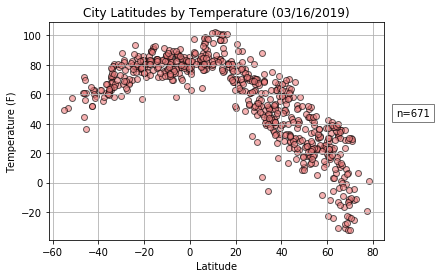

In [21]:
matplot.scatter(df['latitude'], df['temperature'], marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.6)
matplot.xlabel('Latitude')
matplot.ylabel('Temperature (F)')
matplot.title(f'City Latitudes by Temperature ({time.strftime("%m/%d/%Y", time.gmtime(date))})')
count = df['city_name'].count()
matplot.text(90,45, (f'n={count}'), bbox=dict(facecolor='white', alpha=0.5))
matplot.grid()
matplot.savefig('images/jchung_hw6_fig1.png', bbox_inches="tight")
matplot.show()

#### Latitude vs. Humidity Plot

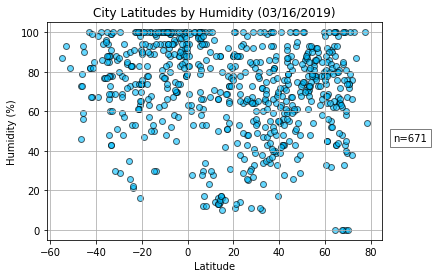

In [22]:
matplot.scatter(df['latitude'], df['humidity'], marker="o", facecolors="deepskyblue", edgecolors="black", alpha=0.6)
matplot.xlabel('Latitude')
matplot.ylabel('Humidity (%)')
matplot.title(f'City Latitudes by Humidity ({time.strftime("%m/%d/%Y", time.gmtime(date))})')
count = df['city_name'].count()
matplot.text(90,45, (f'n={count}'), bbox=dict(facecolor='white', alpha=0.5))
matplot.grid()
matplot.savefig('images/jchung_hw6_fig2.png', bbox_inches="tight")
matplot.show()

#### Latitude vs. Cloudiness Plot

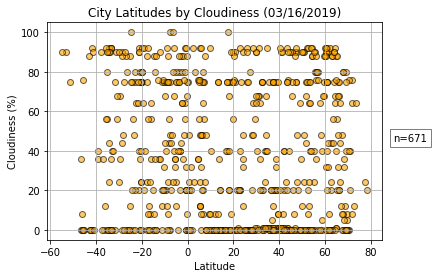

In [23]:
matplot.scatter(df['latitude'], df['cloudiness'], marker="o", facecolors="orange", edgecolors="black", alpha=0.6)
matplot.xlabel('Latitude')
matplot.ylabel('Cloudiness (%)')
matplot.title(f'City Latitudes by Cloudiness ({time.strftime("%m/%d/%Y", time.gmtime(date))})')
count = df['city_name'].count()
matplot.text(90,45, (f'n={count}'), bbox=dict(facecolor='white', alpha=0.5))
matplot.grid()
matplot.savefig('images/jchung_hw6_fig3.png', bbox_inches="tight")
matplot.show()

#### Latitude vs. Wind Speed Plot

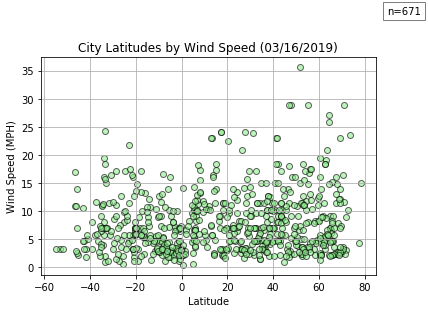

In [24]:
matplot.scatter(df['latitude'], df['wind_speed'], marker="o", facecolors="lightgreen", edgecolors="black", alpha=0.6)
matplot.xlabel('Latitude')
matplot.ylabel('Wind Speed (MPH)')
matplot.title(f'City Latitudes by Wind Speed ({time.strftime("%m/%d/%Y", time.gmtime(date))})')
count = df['city_name'].count()
matplot.text(90,45, (f'n={count}'), bbox=dict(facecolor='white', alpha=0.5))
matplot.grid()
matplot.savefig('images/jchung_hw6_fig3.png', bbox_inches="tight")
matplot.show()